In [106]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Timmy‘s\Desktop\DA_Self-Learning\DA_porfolio_project\DA_Portfolio_Project_5_Correlation_in_Python\movies.csv')

In [107]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [108]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))


#df.fillna(method = "ffill",inplace=True)
    
df = df.dropna(subset=['rating','released','score','rating','votes','director','writer','star','country','budget',
                      'gross','company','runtime'])


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [109]:
#Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [110]:
# change data type

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')



In [111]:
for i in df.index:
    #print(df['released'][i])
    df['released'][i] = df['released'][i].split('(')[0]


#df['released'] = df['released'].apply(lambda x:x.split('(')[0])

In [112]:
#Correct year_data
df['year'] = df['year'].astype(str)
for i in df.index:

    #print(df['released'][i])
    df['year'][i] = df['released'][i].strip().split(",")[-1]

In [113]:
# Still contain several data in wrong format
for i in df.index:

    #print(df['released'][i])
    df['year'][i] = df['year'][i].strip().split(" ")[-1]


In [114]:
df['year']

0       1980
1       1980
2       1980
3       1980
4       1980
5       1980
6       1980
7       1980
8       1981
9       1980
10      1980
11      1984
12      1980
13      1980
14      1980
15      1980
17      1980
18      1980
20      1980
21      1981
22      1980
23      1980
28      1980
29      1980
33      1981
35      1980
36      1980
37      1980
42      1980
46      1980
48      1980
50      1980
51      1980
53      1980
56      1980
57      1980
58      1980
75      1980
77      1980
80      1980
92      1981
94      1981
95      1981
96      1983
97      1982
98      1981
99      1981
100     1981
101     1982
103     1981
105     1981
106     1981
108     1981
110     1981
112     1981
113     1981
114     1981
115     1981
117     1981
118     1982
119     1981
120     1981
121     1981
122     1981
126     1981
127     1981
128     1981
129     1982
130     1982
131     1981
132     1981
133     1981
134     1981
136     1981
137     1981
139     1981
141     1981

In [115]:
df.sort_values(by = ['gross'],inplace=False, ascending=False )

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [116]:
pd.set_option('display.max_row', None)

In [117]:
#drop duplicates
#df['company'].drop_duplicates().sort_values(ascending = False)

In [118]:
#test if
#Budget high correlation with gross
#Company high correaltion


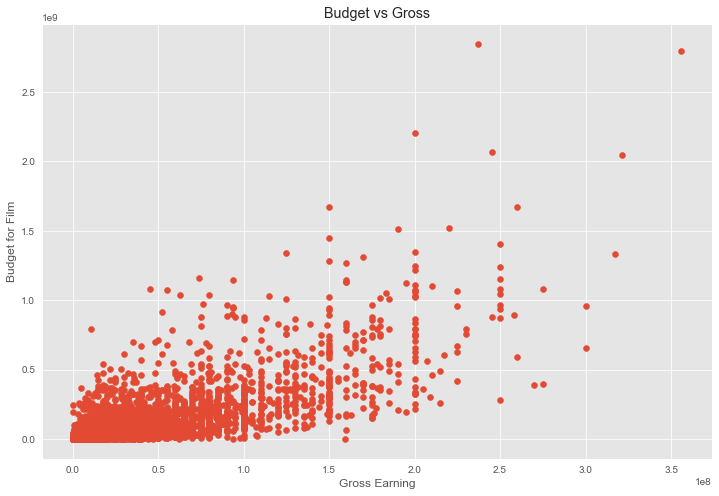

In [119]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()



<AxesSubplot:xlabel='budget', ylabel='gross'>

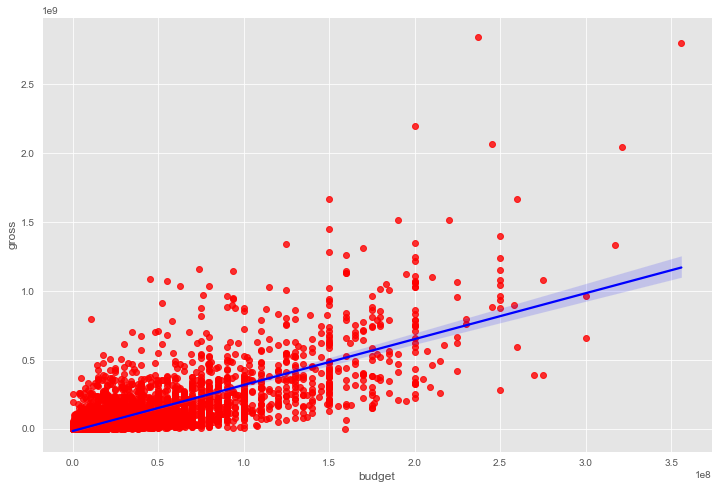

In [120]:
#use regression
sns.regplot(x='budget',y='gross',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [121]:
#Start looking at correlation
df.corr(method='pearson') # pearson, kendall, spearman

score     votes    budget     gross   runtime
score    1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.414068  0.352303  0.318695  0.275796  1.000000

In [122]:
#High correlation: budget and gross at 0.74

Text(0.5, 1.0, 'Correlation Matric for Numeric Features')

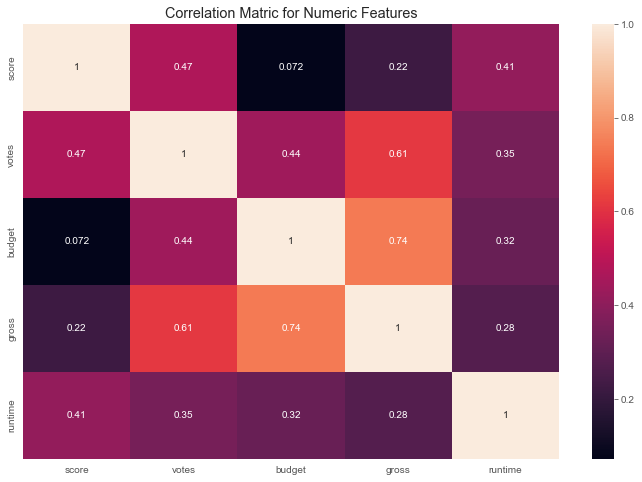

In [123]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')

In [124]:
#Looks at Company
#Company is not Numeric, so change it into numeric
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
0     4692       6      6     0      1239    8.4   927000      1795    2832   
1     3929       6      1     0      1065    5.8    65000      1578    1158   
2     3641       4      0     0      1288    8.7  1200000       757    1818   
3      204       4      4     0      1065    7.7   221000       889    1413   
4      732       6      4     0      1108    7.3   108000       719     351   
5     1509       6      9     0      1814    6.4   123000      1758    3081   
6     3930       6      0     0      1288    7.9   188000       974     576   
7     3122       6      3     0       499    8.2   330000      1269    1257   
8     3732       4      0     1      1276    6.8   101000      1606    1402   
9     4401       6      3     0      1657    7.0    10000      2011     280   
10     332       4      0     0       480    6.1    18000       236    2810   
11    4179       4      1     4      2128    7.3    54000       817    1300   
12    3029       4      1     0       443    5.3    30000      1643    1658   
13    2859       6      6     0      2260    7.7    49000      1666    1653   
14    1208       6      5     0      1108    7.1    37000       207     350   
15    3553       4      6     0      2149    7.2    27000       847    2507   
17      66       4      4     0       499    6.9    29000       333    2315   
18    4143       6      9     0       792    6.8    66000       943    1486   
20     986       6      5     0       676    6.5    20000      2032    3151   
21    1762       6      1     1       105    6.8    14000      1307    2065   
22    4128       4      0     0       197    6.7    22000       502    2959   
23    5289       4      8     0       410    5.3    12000      1654    2492   
28     700       6      5     0      1288    7.2    17000      1870    3099   
29     261       6      5     0       630    6.2    22000      1489    2358   
33     785       4      6     1       105    6.1      604      1146     673   
35    3068       6      4     0      2025    6.2    24000       744    2207   
36    4245       6      4     0      1777    6.3     4300       581     966   
37    2618       6      4     0      2114    6.0    11000      1116    2578   
42    4736       6      0     0      1339    7.1     9000      1613    1802   
46    4312       6      0     0      1239    5.3     3900      1337    2383   
48    4512       4      0     0      1814    5.1     3100       329    2036   
50    3648       4      4     0      2315    7.3    22000      2043    3184   
51    2497       6      4     0      2260    6.8     4500      1025     303   
53     692       4      0     0      1224    6.1    11000       327     768   
56    5193       4      0     0      1542    4.6     2600       793    1078   
57    2818       4      4     0       994    5.4     2400       914    2623   
58    4519       6      0     0       241    5.1     5200       551    1819   
75    4351       1      1     0      1325    5.8     1300       267     939   
77    5240       6      4     0       241    5.9      415      1484    1339   
80    2971       6      6     0      2382    4.0      546       969    1014   
92    1973       4      0     1      1231    8.4   905000      1859    1806   
94     284       6      4     1       292    7.5    97000       974    1524   
95    1301       6      0     1       984    7.2   131000       943    1486   
96    4100       2      9     3        41    7.5   192000      1735    2707   
97    3031       6      4     2      1482    6.2    40000       177     307   
98     603       6      5     1      1100    7.4    47000       207     350   
99     861       4      0     1      1231    6.9    42000       478     277   
100   1329       6      1     1        11    7.4    59000       937    2963   
101   2389       6      0     2      1704    7.6   170000       654    2941   
103   3699       6      4     1      1332    6.9    6800

Text(0.5, 1.0, 'Correlation Matric for Numeric Features')

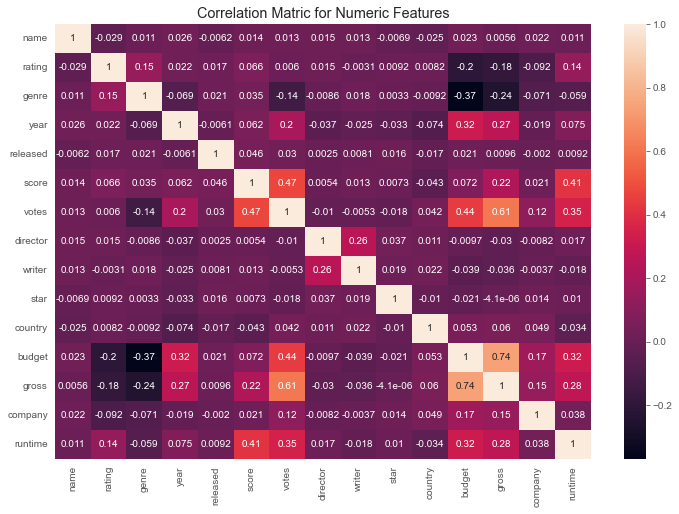

In [127]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')

In [129]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()

In [130]:
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
gross     rating     -0.181906
rating    gross      -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
rating    company    -0.092357
company   rating     -0.092357
year      country    -0.073569
country   year       -0.073569
genre     company    -0.071334
company   genre      -0.071334
genre     year       -0.069147
year      genre      -0.069147
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.037371
year      director   -0.037371
writer    gross      -0.035885
gross     writer     -0.035885
runtime   country    -0.034477
country   runtime    -0.034477
year      star       -0.032687
star      year       -0.032687
director

In [132]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earings
#company has low correlation